# Lesson 1: DIY Boats

In [5]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
# This file contains all the main external libs we'll use
from fastai.imports import *

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [7]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

Using images of boats, classified into 9 classes. Taken from https://www.kaggle.com/clorichel/boat-types-recognition. Images should be downloaded to data/: https://www.kaggle.com/clorichel/boat-types-recognition/downloads/boat-types-recognition.zip/2

Set path to data

In [8]:
PATH = "../../../data/boats/"

## Data manipulation
NOTE: The following will only work once, after the data has been downloaded.

In [6]:
os.listdir(PATH)

['kayak',
 'sailboat',
 'ferry boat',
 'paper boat',
 'valid',
 'models',
 'inflatable boat',
 'freight boat',
 'train',
 'tmp',
 'gondola',
 'cruise ship',
 'buoy']

In [7]:
files = os.listdir(f'{PATH}kayak')[:5]
files

[]

In [8]:
img = plt.imread(f'{PATH}/kayak/{files[0]}')
plt.imshow(img);

IndexError: list index out of range

In [ ]:
img.shape

Manipulate data to generate training and validation sets.

In [9]:
labels = {d: len(os.listdir(f'{PATH}{d}')) for d in os.listdir(f'{PATH}')}
labels

{'kayak': 0,
 'sailboat': 0,
 'ferry boat': 0,
 'paper boat': 0,
 'valid': 9,
 'models': 1,
 'inflatable boat': 0,
 'freight boat': 0,
 'train': 9,
 'tmp': 3,
 'gondola': 0,
 'cruise ship': 0,
 'buoy': 0}

In [10]:
num_images = sum(labels.values())
num_images

22

In [ ]:
val_idxs = get_cv_idxs(num_images)
len(val_idxs)

In [ ]:
os.mkdir(f'{PATH}train')
os.mkdir(f'{PATH}valid')

In [ ]:
idx = 0
for label in labels:
    os.mkdir(f'{PATH}valid/{label}')
    os.mkdir(f'{PATH}train/{label}')
    images = os.listdir(f'{PATH}{label}')
    for image in images:
        if idx in val_idxs:
            os.rename(f'{PATH}{label}/{image}', f'{PATH}valid/{label}/{image}')
        else:
            os.rename(f'{PATH}{label}/{image}', f'{PATH}train/{label}/{image}')
        idx += 1

## Model
NOTE: Start here if using existing data

In [9]:
arch=resnet34
#arch = resnext101_64
sz=224
#bs = 58
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

epoch      trn_loss   val_loss   accuracy                
    0      1.406943   0.54367    0.860068  
    1      0.955623   0.366624   0.890785               



[array([0.36662]), 0.8907849829351536]

In [10]:
data

In [11]:
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8])

In [12]:
data.classes

['buoy',
 'cruise ship',
 'ferry boat',
 'freight boat',
 'gondola',
 'inflatable boat',
 'kayak',
 'paper boat',
 'sailboat']

In [13]:
log_preds = learn.predict()
log_preds.shape

(293, 9)

Predictions are an array of arrays. One outer item per image, one inner item per class, holding the log of the prediction.

In [14]:
log_preds

array([[-4.08188, -6.91439, -5.71531, ..., -6.53027, -5.57299, -0.03657],
       [-2.13701, -3.35667, -3.66407, ..., -3.86965, -2.37887, -0.58688],
       [-0.31667, -3.84879, -4.79755, ..., -2.55758, -3.4407 , -2.94109],
       ...,
       [-8.33749, -9.58827, -9.58956, ..., -9.66174, -8.49004, -0.00089],
       [-6.87928, -7.51659, -6.72156, ..., -8.81796, -7.58921, -0.0079 ],
       [-6.84358, -7.34019, -6.38407, ..., -7.37566, -6.43074, -0.01056]], dtype=float32)

Argmax finds the index of the highest value (prediction) in an array -> the predicted class.

In [15]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to class index
preds

array([8, 8, 0, 6, 0, 0, 0, 0, 8, 8, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 8, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 8, 2, 8, 2, 2, 2, 2, 2, 8, 2, 2,
       1, 2, 1, 1, 2, 4, 1, 2, 8, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 1, 4, 6, 6, 8,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 8, 0, 6, 6, 6, 6, 8, 7, 7, 7, 8, 6, 7, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8])

Convert log probabilities using .exp. [:,$i] takes the ith value of each array, i.e. predictions for class with index i.

In [16]:
def get_probs(cls_idx):
    return np.exp(log_preds[:,cls_idx])

In [17]:
l = data.classes.index('buoy')
probs = get_probs(l)
probs

array([0.01688, 0.11801, 0.72857, 0.10326, 0.95009, 0.68617, 0.87718, 0.72628, 0.31339, 0.05134, 0.5044 ,
       0.5398 , 0.71752, 0.68079, 0.00087, 0.00464, 0.00003, 0.00024, 0.00003, 0.00009, 0.00282, 0.00035,
       0.00012, 0.0075 , 0.00017, 0.00001, 0.01226, 0.00169, 0.01395, 0.00013, 0.00068, 0.00003, 0.00408,
       0.00052, 0.00036, 0.00324, 0.00004, 0.00001, 0.00002, 0.00018, 0.01187, 0.00014, 0.0005 , 0.00013,
       0.01406, 0.00222, 0.00108, 0.03029, 0.04041, 0.02556, 0.00001, 0.00298, 0.00014, 0.00006, 0.00001,
       0.0036 , 0.01152, 0.08051, 0.00076, 0.13329, 0.01758, 0.04943, 0.00737, 0.0075 , 0.00135, 0.10096,
       0.00451, 0.00366, 0.04157, 0.0016 , 0.0032 , 0.00043, 0.00946, 0.01448, 0.00905, 0.01588, 0.0257 ,
       0.02804, 0.00194, 0.00002, 0.02837, 0.00049, 0.04622, 0.00375, 0.     , 0.00002, 0.0001 , 0.00114,
       0.00008, 0.00046, 0.00228, 0.00039, 0.05305, 0.00028, 0.0001 , 0.00582, 0.00002, 0.00459, 0.00001,
       0.00023, 0.00049, 0.00001, 0.00017, 0.0

In [18]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [19]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [20]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [f'{data.classes[preds[x]]}\n{get_probs(data.val_y[x])[x]}' for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')

Correctly classified


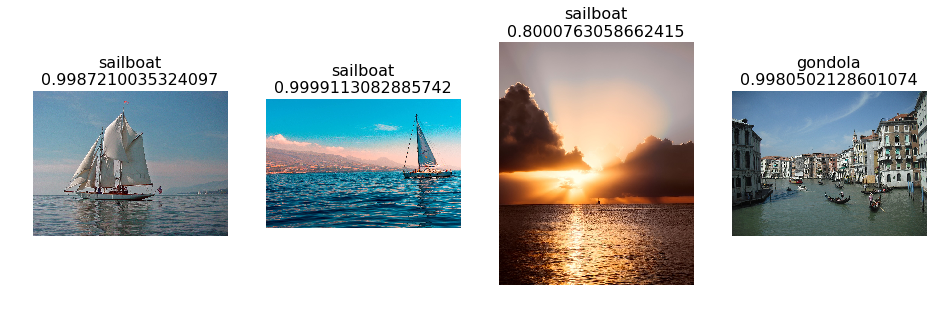

In [21]:
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


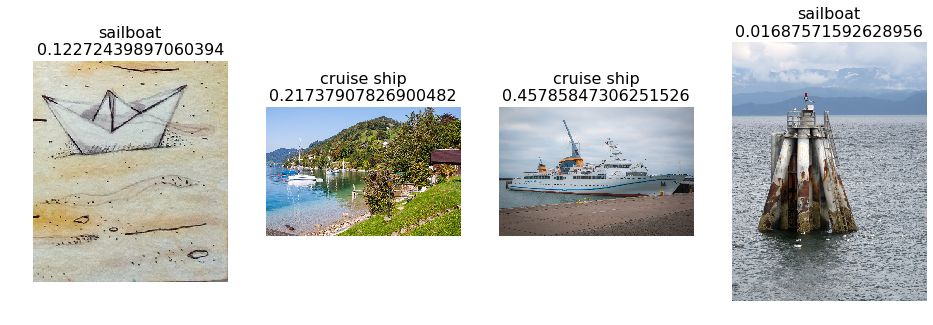

In [22]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [23]:
def most_by_mask(y, mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * get_probs(y)[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    # Mask: predicted [in]correctly, and class y.
    return most_by_mask(y, ((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

In [24]:
# Correct buoys:
kayak_idx = data.classes.index('kayak')
correct_kayaks = np.where((preds == data.val_y) & (data.val_y == kayak_idx))[0]
correct_kayaks

array([134, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 176, 177,
       178, 179])

In [25]:
correct_kayaks[np.argsort(get_probs(kayak_idx)[correct_kayaks])[:4]]

array([144, 172, 149, 170])

Most correct buoy
Most correct cruise ship
Most correct ferry boat
Most correct freight boat
Not Found.
Most correct gondola
Most correct inflatable boat
Not Found.
Most correct kayak
Most correct paper boat
Most correct sailboat


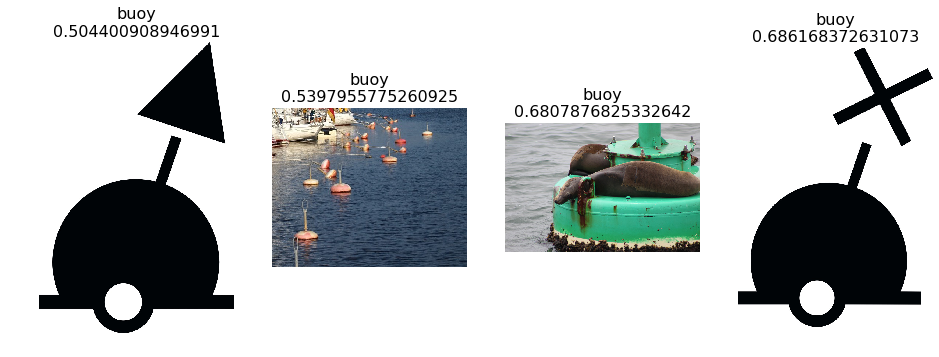

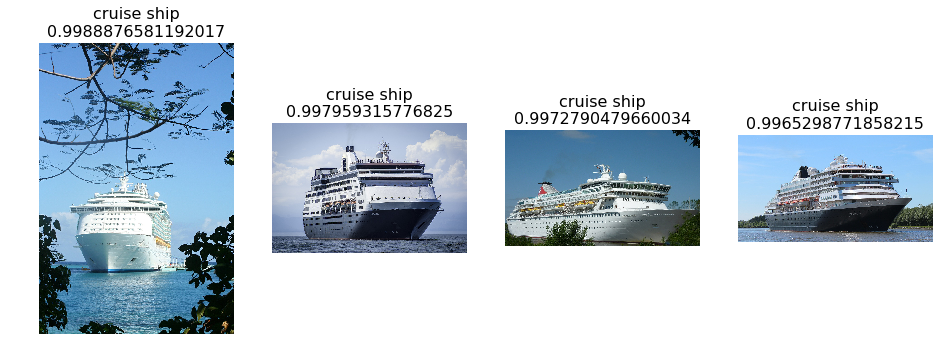

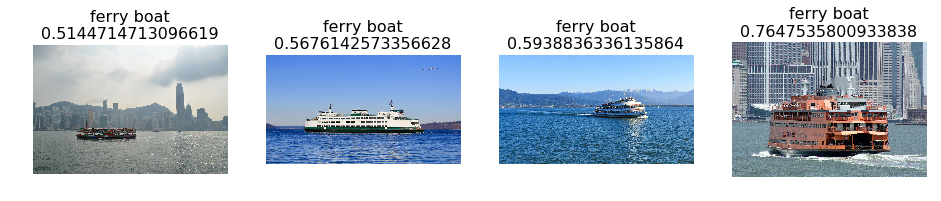

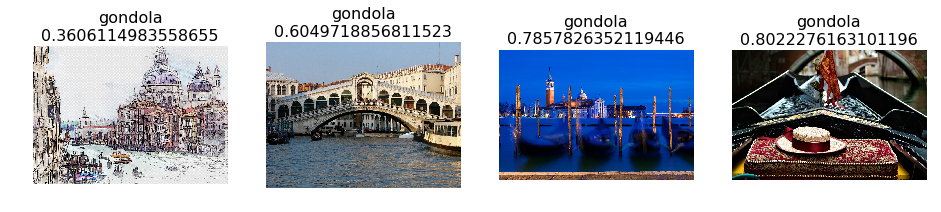

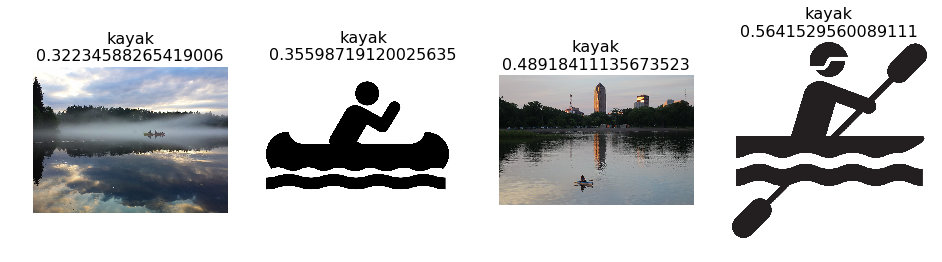

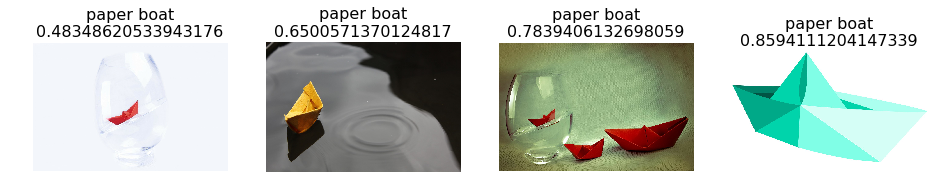

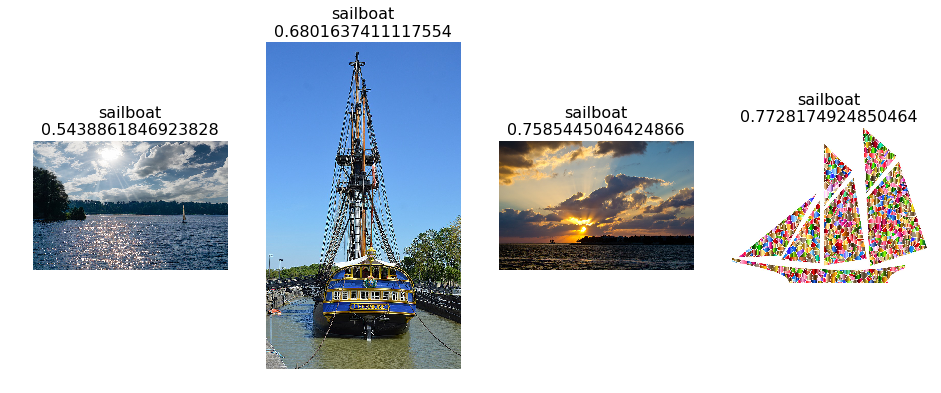

In [26]:
for idx, cls in enumerate(data.classes):
    plot_val_with_title(most_by_correct(idx, True), f"Most correct {cls}")

Most incorrect buoy
Most incorrect cruise ship
Most incorrect ferry boat
Most incorrect freight boat
Most incorrect gondola
Not Found.
Most incorrect inflatable boat
Most incorrect kayak
Most incorrect paper boat
Most incorrect sailboat


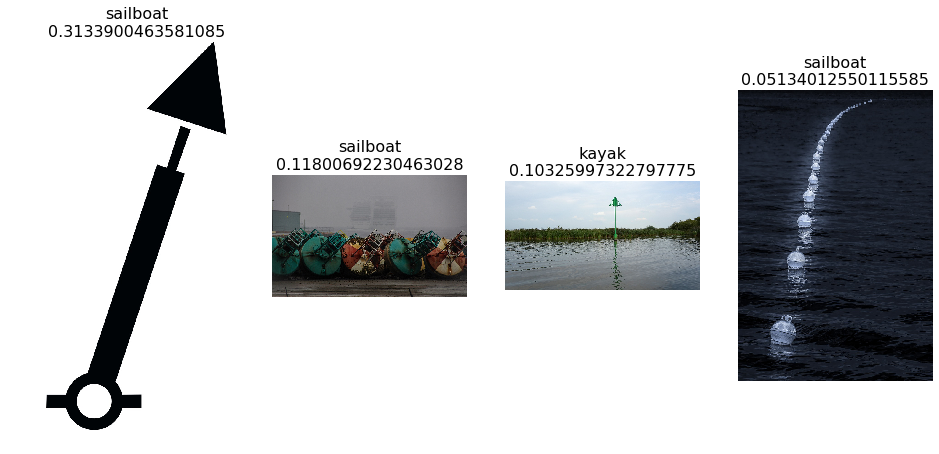

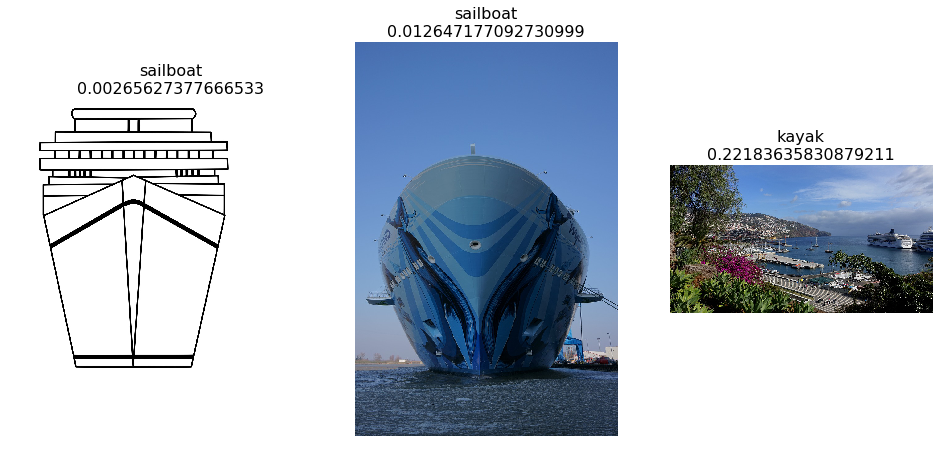

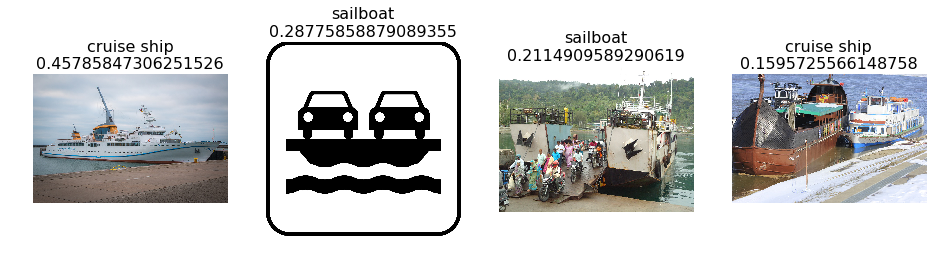

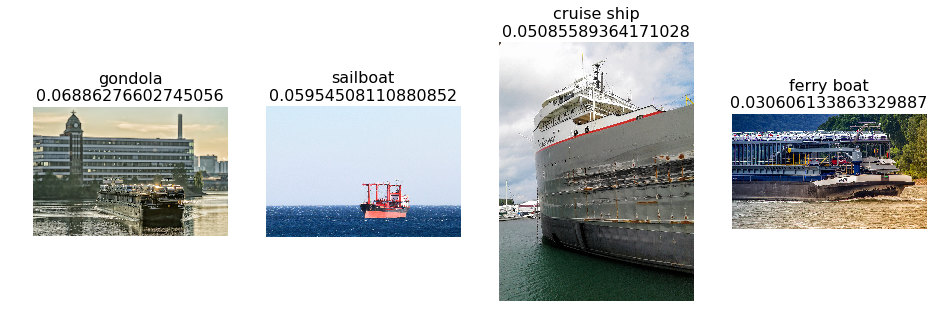

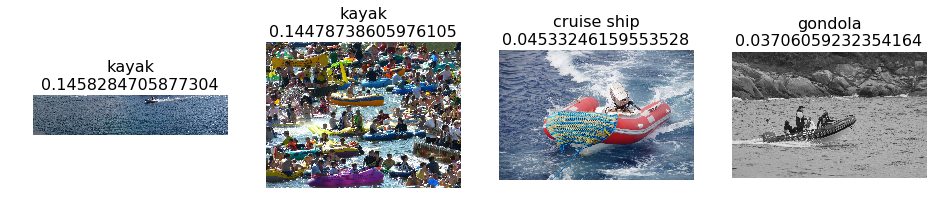

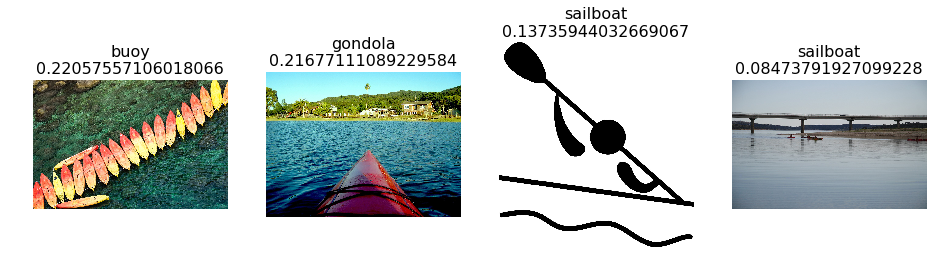

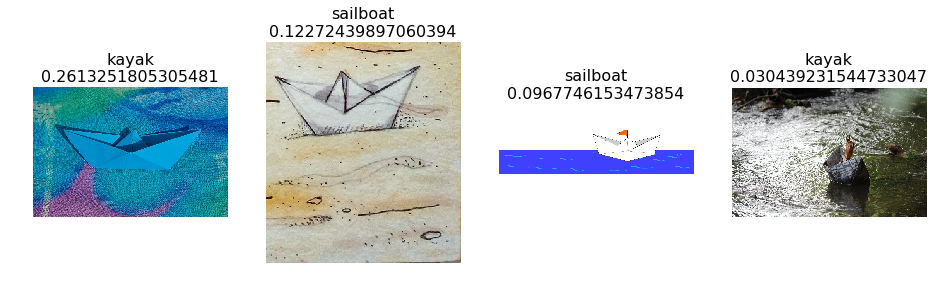

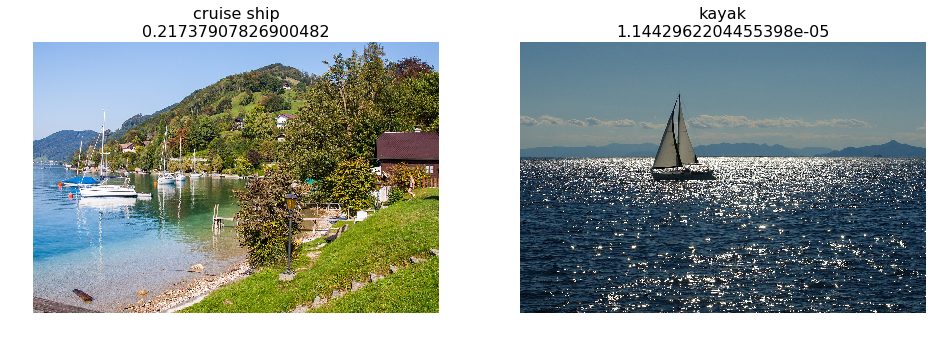

In [27]:
for idx, cls in enumerate(data.classes):
    plot_val_with_title(most_by_correct(idx, False), f"Most incorrect {cls}")

# Learning Rate

# Following the guide
1. precompute=True
1. Use `lr_find()` to find highest learning rate where loss is still clearly improving
1. Train last layer from precomputed activations for 1-2 epochs
1. Train last layer with data augmentation (i.e. precompute=False) for 2-3 epochs with cycle_len=1
1. Unfreeze all layers
1. Set earlier layers to 3x-10x lower learning rate than next higher layer
1. Use `lr_find()` again
1. Train full network with cycle_mult=2 until over-fitting

## 1. Precompute=True

In [28]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

## 2. Find LR

In [29]:
learn.lr_find(start_lr=1e-3, end_lr=1e-1)

epoch      trn_loss   val_loss   accuracy                
    0      1.652909   0.609802   0.853242  



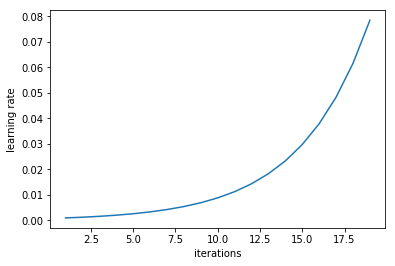

In [30]:
learn.sched.plot_lr()

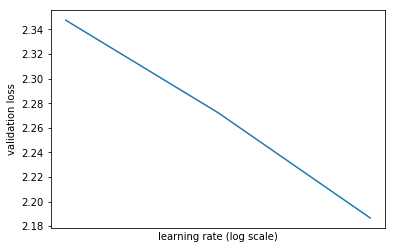

In [31]:
learn.sched.plot()

In [ ]:
learning_rate = 0.02

## 3. Train last layer

In [ ]:
learn.fit(learning_rate, 2)

epoch      trn_loss   val_loss   accuracy                 
    0      1.17918    0.513955   0.860068  
    1      0.747578   0.388272   0.890785                



[array([0.38827]), 0.8907849794768636]

## 4. Train last layer with data augmentation

In [ ]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [ ]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [ ]:
ims = np.stack([get_augs() for i in range(6)])

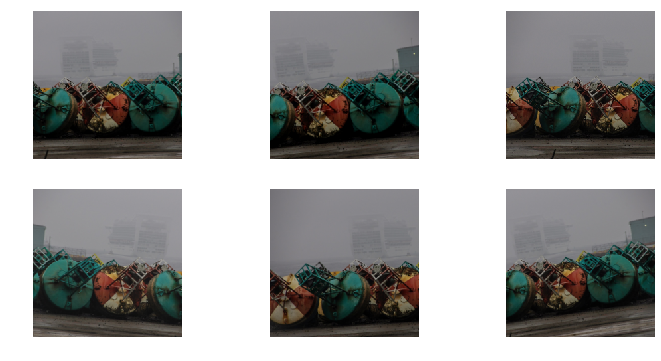

In [ ]:
plots(ims, rows=2)

In [ ]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [ ]:
learn.fit(learning_rate, 1)

epoch      trn_loss   val_loss   accuracy                
    0      1.29916    0.466164   0.866894  



[array([0.46616]), 0.8668941944939285]

In [ ]:
learn.precompute=False

In [ ]:
learn.fit(learning_rate, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                  
    0      0.616056   0.411086   0.880546  
    1      0.546232   0.375208   0.877133                  
    2      0.501165   0.348401   0.890785                  



[array([0.3484]), 0.8907849849694418]

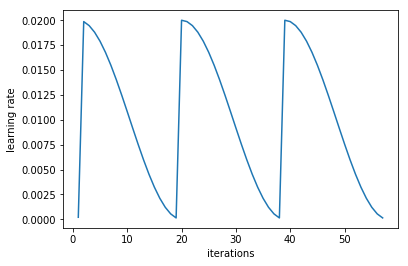

In [ ]:
learn.sched.plot_lr()

## 5. Unfreeze

In [ ]:
learn.unfreeze()

## 6. Train later layers at 3x - 10x lower

Use a 3x difference between layers

In [ ]:
diff = 10

In [ ]:
lr = np.array([learning_rate/diff/diff, learning_rate/diff, learning_rate])

In [ ]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.616729   0.322338   0.897611  
    1      0.49022    0.272541   0.914676                  
    2      0.407014   0.26864    0.90785                   
    3      0.338811   0.248747   0.914676                  
    4      0.279908   0.227536   0.931741                  
    5      0.235604   0.219943   0.931741                  
    6      0.194274   0.216458   0.931741                  



[array([0.21646]), 0.931740614334471]

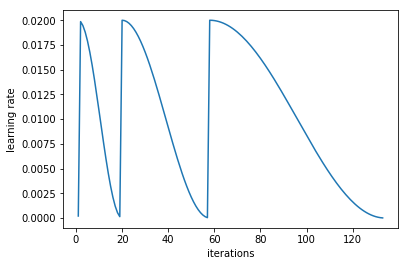

In [ ]:
learn.sched.plot_lr()

## 7. Use lr_find again

In [ ]:
learn.lr_find()

 84%|████████▍ | 16/19 [00:14<00:01,  1.75it/s, loss=0.57] 

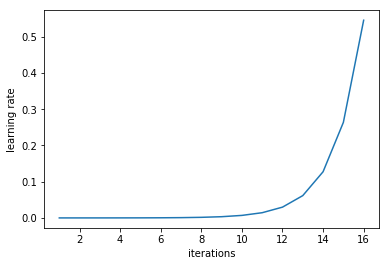

In [ ]:
learn.sched.plot_lr()

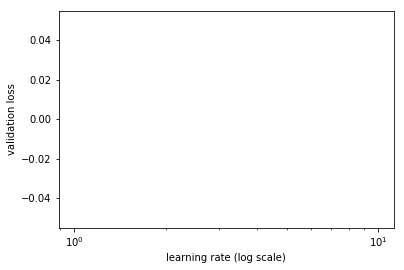

In [ ]:
learn.sched.plot()

## 8. Train with cycle_mult=2 until overfitting

In [ ]:
learn.fit(learning_rate, 3, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.470727   2.581059   0.515358  
 89%|████████▉ | 17/19 [00:16<00:02,  1.01s/it, loss=0.914]